# WORLD HAPPINESS

The world happines report dataset was first published in 2012. It is a survey released by the United Nations.
It ranks 155 countries by their happiness using data from the Gallup World Poll.<p />

The happiness scores are based on answers to main life evaluation question.This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. 

The other columns are the following factors per country:<br />
-Economic production<br />
-Social support(Family)<br />
-Life expectancy<br />
-Freedom<br />
-Absence of corruption<br />
-Generosity<p />

These six factors have no impact in the total score reported for each country. Each factor have positive values visualizing how higher a country is in terms of each specific factor than Dystopia.<p />

Dystopia is an imaginary country with the least happy people which factors are equal to those of the country with less happiness in the list.<p />

-There is a 7th factor name Dystrophia Residual which is a combination of other unexplained components according to the source. My goal is to determine the relationship that exists between known components and the happiness of a country, hence this residual component will be discarted.<br />
-The source doesn't describe what the Family feature is on the dataset, however it seems to be Social support.<br />
-There are two features named Whisker high and Whisker low, apparently they were used to calculate the Happiness Score as the average of the previous 2. We only need the score itself hence they will be discarted.<p />

Source: https://www.kaggle.com/unsdsn/world-happiness<br />

## DATA VISUALIZATION

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

### Read Dataset

In [2]:
dsFile='2017.csv'
dataFrame=pd.read_csv(dsFile,header=0,index_col=0)
dataFrame.head()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
Country,,,,,,,,,,,
Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


#### Since the main goal is to classify countries by happiness: 
I need to use Happines.Score, however since it is a floating value, it will probably generate 1 class for every sample. I need to use the scores to classify the countries in specific groups of happiness. For convenience i will create 5 levels of happiness:
-To generate the levels of happiness, i will use the max and min scores to create a range of values for each lvl
$$lvl=\frac{score-min}{max-min}*5$$.
As a result, the levels will go from 0 to 5 as floating number. They can then be rounded to obtain integer values

In [3]:
scoreSeries=dataFrame['Happiness.Score']
levelSeries=5*(scoreSeries-np.min(scoreSeries))/(np.max(scoreSeries)-np.min(scoreSeries))
levelSeries=np.round(levelSeries)
levelValues=np.int8(levelSeries)
levelSeries=pd.Series(levelValues,index=levelSeries.index)
dataFrame['Happiness.Score']=levelSeries
#Remove data related to Happiness Score.
del dataFrame['Happiness.Rank']
del dataFrame['Whisker.high']
del dataFrame['Whisker.low']
#Remove unknow data
del dataFrame['Dystopia.Residual']
dataFrame.head()

,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.
Country,,,,,,,
Norway,5,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964
Denmark,5,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770
Iceland,5,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527
Switzerland,5,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007
Finland,5,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612


### Summary of the Data

In [4]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, Norway to Central African Republic
Data columns (total 7 columns):
Happiness.Score                  155 non-null int8
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
dtypes: float64(6), int8(1)
memory usage: 8.6+ KB


In [5]:
dataFrame.describe()

,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,2.767742,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120
std,1.194247,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271
50%,3.000000,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848
75%,4.000000,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296
max,5.000000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308


In [6]:
gbyScore=dataFrame.groupby(by='Happiness.Score')
gbyScore.size()

Happiness.Score
0     2
1    24
2    36
3    51
4    30
5    12
dtype: int64

### Presentation and Visualization of Data

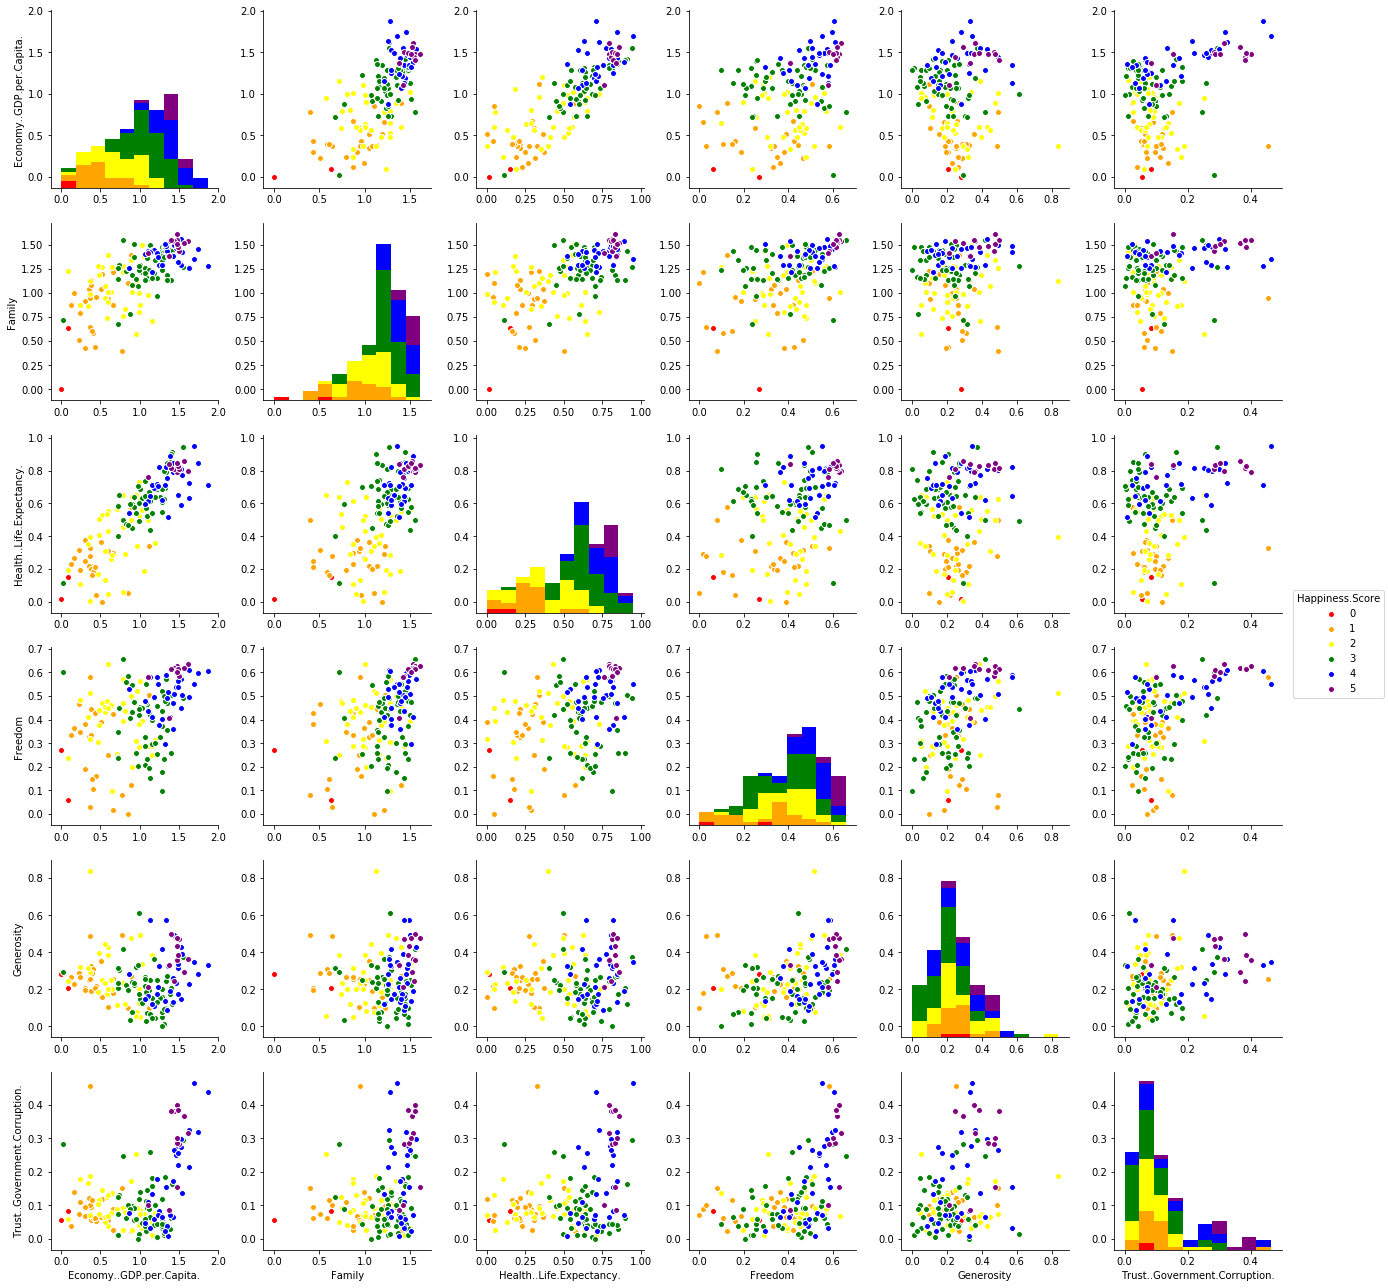

In [28]:
colNames=list(dataFrame) #List of dataframe column names
del colNames[0] #Remove scores from the list, we dont want to plot this
sns.pairplot(data=dataFrame,hue='Happiness.Score',vars=colNames,palette=['red','orange','yellow','green','blue','purple'],size=3,aspect=1)
plt.show()

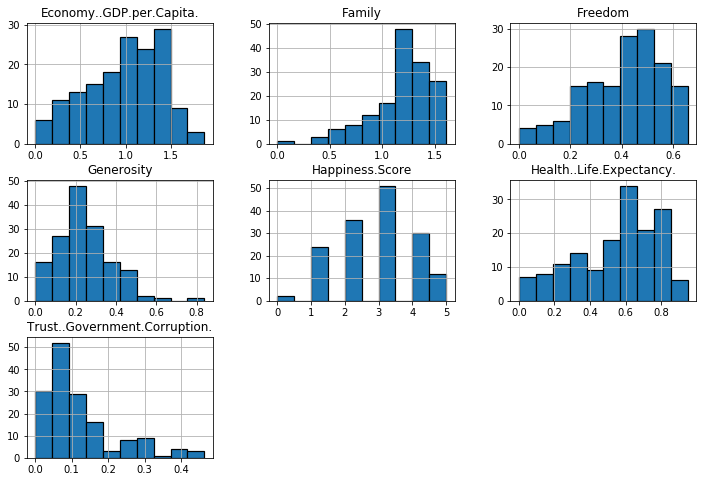

In [39]:
dataFrame.hist(linewidth=1.2,edgecolor='black',figsize=(12,8))
plt.show()

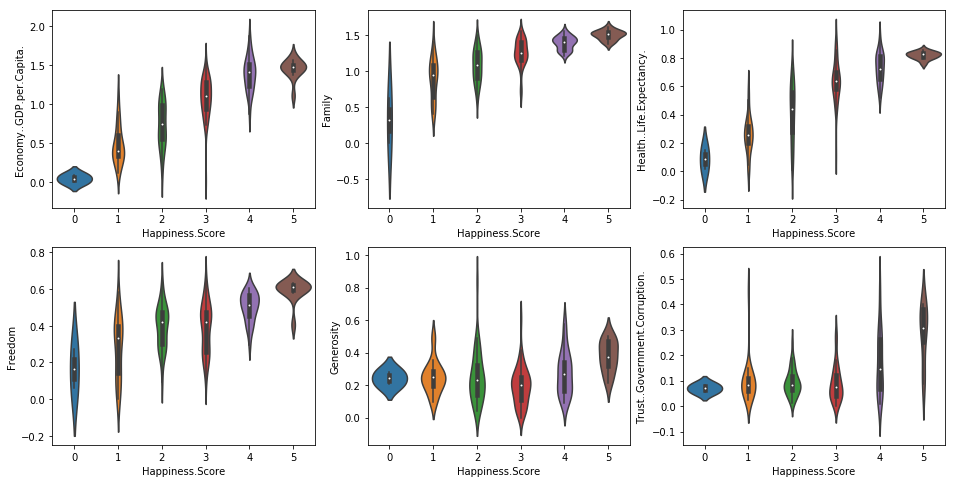

In [45]:
plt.figure(figsize=(16,8))
for i in range(0,6):
    plt.subplot(2,3,i+1)
    sns.violinplot(data=dataFrame,x='Happiness.Score',y=colNames[i])
plt.show()

In [32]:
dataFrame.hist?

In [26]:
colNames

['Happiness.Score',
 'Economy..GDP.per.Capita.',
 'Family',
 'Health..Life.Expectancy.',
 'Freedom',
 'Generosity',
 'Trust..Government.Corruption.']

In [17]:
sns.pairplot?